In [28]:
%matplotlib inline

In [29]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.cluster import KMeans
from datetime import datetime 
from itertools import count

In [30]:
# Stock market clustering using K-means
# Load the data
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'}


In [31]:
companies = sorted(companies_dict.items(), key=lambda x: x[1])
print(companies)

[('Apple', 'AAPL'), ('Amazon', 'AMZN'), ('American Express', 'AXP'), ('Boeing', 'BA'), ('Bank of America', 'BAC'), ('Chevron', 'CVX'), ('Ford', 'F'), ('General Electrics', 'GE'), ('Honda', 'HMC'), ('IBM', 'IBM'), ('Intel', 'INTC'), ('Johnson & Johnson', 'JNJ'), ('Coca Cola', 'KO'), ('Lockheed Martin', 'LMT'), ('MasterCard', 'MA'), ('McDonalds', 'MCD'), ('Microsoft', 'MSFT'), ('Northrop Grumman', 'NOC'), ('Pepsi', 'PEP'), ('Toyota', 'TM'), ('Texas Instruments', 'TXN'), ('Valero Energy', 'VLO'), ('Walgreen', 'WBA'), ('Exxon', 'XOM')]


In [32]:
companies_sorted = [x[1] for x in companies]
companies_sorted

['AAPL',
 'AMZN',
 'AXP',
 'BA',
 'BAC',
 'CVX',
 'F',
 'GE',
 'HMC',
 'IBM',
 'INTC',
 'JNJ',
 'KO',
 'LMT',
 'MA',
 'MCD',
 'MSFT',
 'NOC',
 'PEP',
 'TM',
 'TXN',
 'VLO',
 'WBA',
 'XOM']

In [33]:
!pip install yfinance
import yfinance as yf

In [34]:
# Sort the companies based on their ticker symbol
companies = sorted(companies_dict.items(), key=lambda x: x[1])
companies_sorted = [x[1] for x in companies]

# Get the current date for 'end_date'
end_date = datetime.now().strftime('%Y-%m-%d')

# Initialize an empty dictionary to hold the closing price data
data_dict = {}

# Fetch historical data for each ticker in the sorted list
for ticker in companies_sorted:
    # Fetch the data for each ticker
    ticker_data = yf.Ticker(ticker).history(period='max', end=end_date, interval='1m')
    data_dict[ticker] = ticker_data['Close']

# Combine all data into a single DataFrame
df = pd.DataFrame(data_dict)

# Print the resulting DataFrame
print(df)

                                 AAPL        AMZN         AXP          BA  \
Datetime                                                                    
2025-01-30 09:30:00-05:00  238.910004  235.919998  316.765015  174.690002   
2025-01-30 09:31:00-05:00  239.559998  237.330002  317.119995  174.210007   
2025-01-30 09:32:00-05:00  240.759995  237.289993  317.092499  174.755905   
2025-01-30 09:33:00-05:00  239.690002  236.199997  317.829987  173.990005   
2025-01-30 09:34:00-05:00  239.969894  235.455002  317.408997  174.190002   
...                               ...         ...         ...         ...   
2025-02-05 15:55:00-05:00  232.059998  236.210007  320.200012  181.600006   
2025-02-05 15:56:00-05:00  232.270004  236.139999  320.299988  181.639999   
2025-02-05 15:57:00-05:00  232.380005  236.125000  320.399994  181.610001   
2025-02-05 15:58:00-05:00  232.505005  236.089996  320.269989  181.660004   
2025-02-05 15:59:00-05:00  232.460007  236.130005  320.494995  181.830002   

In [35]:
df.head()
pd.options.display.max_columns=None

In [36]:
df.head()

,AAPL,AMZN,AXP,BA,BAC,CVX,F,GE,HMC,IBM,INTC,JNJ,KO,LMT,MA,MCD,MSFT,NOC,PEP,TM,TXN,VLO,WBA,XOM
Datetime,,,,,,,,,,,,,,,,,,,,,,,,
2025-01-30 09:30:00-05:00,238.910004,235.919998,316.765015,174.690002,47.005001,156.369995,10.280,200.277496,28.674999,251.320908,19.584999,151.785004,63.809898,456.524994,563.640015,291.869995,417.049988,475.095001,151.300003,190.50,180.764999,143.270004,11.3700,109.500000
2025-01-30 09:31:00-05:00,239.559998,237.330002,317.119995,174.210007,46.970001,156.029999,10.270,200.190002,28.700001,251.000000,19.539200,151.570007,63.930000,455.904999,563.804993,290.570007,418.484985,475.084991,150.955002,190.75,181.250000,141.679993,11.4800,109.129997
2025-01-30 09:32:00-05:00,240.759995,237.289993,317.092499,174.755905,46.990002,156.399994,10.290,201.050003,28.692301,250.085007,19.580000,151.494995,63.814999,456.640015,565.929993,290.609985,416.100006,478.000000,151.059998,NaN,181.199997,142.070007,11.4621,109.224998
2025-01-30 09:33:00-05:00,239.690002,236.199997,317.829987,173.990005,47.014999,156.304993,10.291,201.729996,28.705000,248.919998,19.635000,151.479996,63.845001,459.285004,565.315002,290.519989,415.450012,482.589996,151.029999,NaN,181.990005,141.289993,11.5150,109.275002
2025-01-30 09:34:00-05:00,239.969894,235.455002,317.408997,174.190002,46.994999,156.535599,10.310,201.570007,28.740000,247.160004,19.615000,151.759995,63.734501,459.109985,564.869995,291.105011,416.599915,484.389709,151.449997,NaN,181.929993,141.384995,11.4900,109.430000


In [37]:
df.shape

(1950, 24)

In [38]:
df.columns

Index(['AAPL', 'AMZN', 'AXP', 'BA', 'BAC', 'CVX', 'F', 'GE', 'HMC', 'IBM',
       'INTC', 'JNJ', 'KO', 'LMT', 'MA', 'MCD', 'MSFT', 'NOC', 'PEP', 'TM',
       'TXN', 'VLO', 'WBA', 'XOM'],
      dtype='object')

In [39]:
# Check the current index of the DataFrame
print(df.index)

DatetimeIndex(['2025-01-30 09:30:00-05:00', '2025-01-30 09:31:00-05:00',
               '2025-01-30 09:32:00-05:00', '2025-01-30 09:33:00-05:00',
               '2025-01-30 09:34:00-05:00', '2025-01-30 09:35:00-05:00',
               '2025-01-30 09:36:00-05:00', '2025-01-30 09:37:00-05:00',
               '2025-01-30 09:38:00-05:00', '2025-01-30 09:39:00-05:00',
               ...
               '2025-02-05 15:50:00-05:00', '2025-02-05 15:51:00-05:00',
               '2025-02-05 15:52:00-05:00', '2025-02-05 15:53:00-05:00',
               '2025-02-05 15:54:00-05:00', '2025-02-05 15:55:00-05:00',
               '2025-02-05 15:56:00-05:00', '2025-02-05 15:57:00-05:00',
               '2025-02-05 15:58:00-05:00', '2025-02-05 15:59:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Datetime', length=1950, freq=None)


In [40]:
# Reset the index and drop the 'Datetime' index completely
df = df.reset_index(drop=True)

# Check the head of the DataFrame
print(df.head())

         AAPL        AMZN         AXP          BA        BAC         CVX  \
0  238.910004  235.919998  316.765015  174.690002  47.005001  156.369995   
1  239.559998  237.330002  317.119995  174.210007  46.970001  156.029999   
2  240.759995  237.289993  317.092499  174.755905  46.990002  156.399994   
3  239.690002  236.199997  317.829987  173.990005  47.014999  156.304993   
4  239.969894  235.455002  317.408997  174.190002  46.994999  156.535599   

        F          GE        HMC         IBM       INTC         JNJ  \
0  10.280  200.277496  28.674999  251.320908  19.584999  151.785004   
1  10.270  200.190002  28.700001  251.000000  19.539200  151.570007   
2  10.290  201.050003  28.692301  250.085007  19.580000  151.494995   
3  10.291  201.729996  28.705000  248.919998  19.635000  151.479996   
4  10.310  201.570007  28.740000  247.160004  19.615000  151.759995   

          KO         LMT          MA         MCD        MSFT         NOC  \
0  63.809898  456.524994  563.640015  29

In [41]:
# Calculate annual mean returns and variances

In [59]:
df.shape

(1950, 24)

In [42]:
daily_returns=df.pct_change()

/var/folders/0v/tzb6k7wd7x5bwyzqrcw753m40000gn/T/ipykernel_46877/404287454.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns=df.pct_change()


In [60]:
daily_returns.head()

,AAPL,AMZN,AXP,BA,BAC,CVX,F,GE,HMC,IBM,INTC,JNJ,KO,LMT,MA,MCD,MSFT,NOC,PEP,TM,TXN,VLO,WBA,XOM
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002721,0.005977,0.001121,-0.002748,-0.000745,-0.002174,-0.000973,-0.000437,0.000872,-0.001277,-0.002338,-0.001416,0.001882,-0.001358,0.000293,-0.004454,0.003441,-0.000021,-0.002280,0.001312,0.002683,-0.011098,0.009675,-0.003379
2,0.005009,-0.000169,-0.000087,0.003134,0.000426,0.002371,0.001947,0.004296,-0.000268,-0.003645,0.002088,-0.000495,-0.001799,0.001612,0.003769,0.000138,-0.005699,0.006136,0.000696,0.000000,-0.000276,0.002753,-0.001559,0.000871
3,-0.004444,-0.004594,0.002326,-0.004383,0.000532,-0.000607,0.000097,0.003382,0.000443,-0.004658,0.002809,-0.000099,0.000470,0.005792,-0.001087,-0.000310,-0.001562,0.009603,-0.000199,0.000000,0.004360,-0.005490,0.004615,0.000458
4,0.001168,-0.003154,-0.001325,0.001149,-0.000425,0.001475,0.001846,-0.000793,0.001219,-0.007071,-0.001019,0.001848,-0.001731,-0.000381,-0.000787,0.002014,0.002768,0.003729,0.002781,0.000000,-0.000330,0.000672,-0.002171,0.001418


In [62]:
# Calculating the annual mean returns and variances
annual_mean_returns= daily_returns.mean()* 252
annual_variance_returns= daily_returns.var()* 252


In [64]:
annual_variance_returns

AAPL    0.000417
AMZN    0.000271
AXP     0.000132
BA      0.000225
BAC     0.000134
CVX     0.000186
F       0.000490
GE      0.000183
HMC     0.001021
IBM     0.000323
INTC    0.000501
JNJ     0.000065
KO      0.000064
LMT     0.000109
MA      0.000146
MCD     0.000072
MSFT    0.000127
NOC     0.000167
PEP     0.000199
TM      0.000460
TXN     0.000232
VLO     0.000449
WBA     0.003725
XOM     0.000146
dtype: float64

In [46]:
#creating a new dataframe
df2 = pd.DataFrame(df.columns, columns=['Stock Symbols'])

In [47]:
df2['Variance']= annual_variance_returns.values

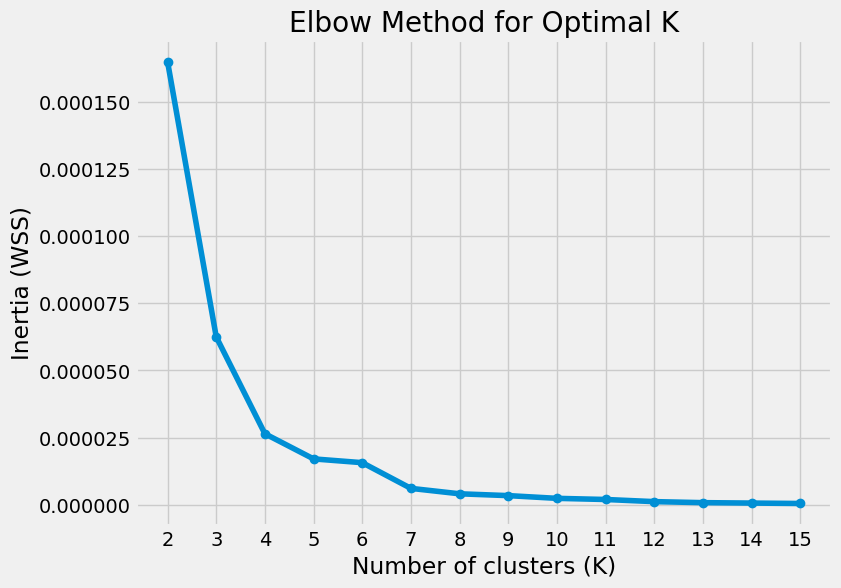

In [50]:
# Use the elbow curve to determine the number of clusters to grup the stocks
# Get and store the annual retrusn and anuual variances
X= df2[['Variance','Returns']].values
inertia =[]
for k in range(2,16):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 16), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (WSS)')
plt.xticks(range(2, 16))
plt.grid(True)
plt.show()

In [71]:
# Get and show the labels and groups
kmeans=KMeans(n_clusters=4, random_state=42).fit(X)
labels= kmeans.labels_
labels


array([2, 0, 0, 3, 0, 2, 2, 3, 0, 3, 0, 0, 2, 2, 0, 2, 2, 0, 2, 3, 0, 2,
       1, 0], dtype=int32)

In [72]:
df2['Clusters_labels']= labels

In [73]:
df2

,Stock Symbols,Variance,Returns,Clusters_labels
0,AAPL,0.000417,-0.003332,2
1,AMZN,0.000271,0.000251,0
2,AXP,0.000132,0.001580,0
3,BA,0.000225,0.005292,3
4,BAC,0.000134,0.000356,0
5,CVX,0.000186,-0.002723,2
6,F,0.000490,-0.003324,2
7,GE,0.000183,0.002871,3
8,HMC,0.001021,0.000674,0
9,IBM,0.000323,0.006207,3


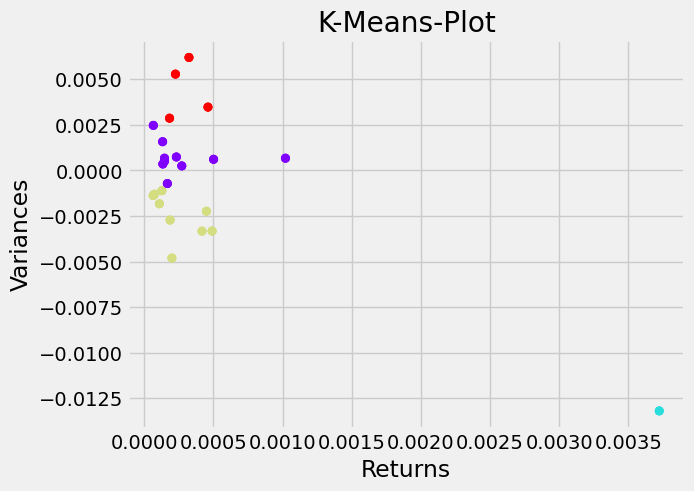

In [58]:

plt.scatter(X[:,0],X[:,1],c=labels, cmap='rainbow')
plt.title('K-Means-Plot')
plt.xlabel('Returns')
plt.ylabel('Variances')
plt.show()


In [79]:
def diversed_portfolio():
    for i in range(0,4):
        symbol = df2[df2['Clusters_labels']==i].head(1)
        print(symbol[['Stock Symbols','Clusters_labels']])
    

In [80]:
diversed_portfolio()

  Stock Symbols  Clusters_labels
1          AMZN                0
   Stock Symbols  Clusters_labels
22           WBA                1
  Stock Symbols  Clusters_labels
0          AAPL                2
  Stock Symbols  Clusters_labels
3            BA                3
